<p><img alt="udeA logo" height="160px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><center>Fundamentos de Deep Learning</center></font></h1>
<font  size="4">
<p><center>Universidad de Antioquia <br> Facultad de Ingeniería</b></font></center></p>
<center><font size="4">Proyecto Final</font></center>
</font>

## Modelo generativo de difusión para generar imágenes de aves

Se utilizó el NABirds Dataset https://dl.allaboutbirds.org/nabirds

### Descargar y preparar el conjunto de datos

### Optimización del Conjunto de Datos para una Mejor Eficiencia Computacional en el Reconocimiento Detallado


<div style="text-align: justify;">
En el contexto del entrenamiento del modelo de difusión para la generación detallada de imágenes de aves, se han identificado desafíos inherentes al tamaño del conjunto de datos NABirds V1. La magnitud del conjunto de datos original es de aproximadamente 9 GB y contiene más de 48,000 fotografías anotadas representando 400 especies de aves en América del Norte, esto plantea limitaciones computacionales notables en el proceso de entrenamiento, especialmente cuando se trabaja con recursos computacionales restringidos (GPUs).
</div>
<br>

<div style="text-align: justify;">
Visión general del conjunto de datos: NABirds V1, con más de 550 categorías visuales organizadas taxonómicamente, es una colección exhaustiva. Cada una de las 400 especies cuenta con más de 100 fotografías, proporcionando una representación integral de la diversidad aviar. Las anotaciones detalladas, que incluyen clasificaciones específicas para machos, hembras y juveniles, contribuyen a una colección sofisticada de 700 categorías visuales (Para más información consultar El Laboratorio de Ornitología de Cornell).
</div>
<br>

<div style="text-align: justify;">
Estrategia de optimización: Conscientes de la necesidad de optimizar los recursos computacionales, se ha implementado una estrategia que está centrada en la creación de un subconjunto más manejable (de menor tamaño) del conjunto de datos. El enfoque se ha dirigido específicamente hacia las categorías "Allen's Hummingbird (Adult Male)" y "Allen's Hummingbird (Female, immature)", seleccionadas por su relevancia para los objetivos de generación sintética de imágenes detalladas de aves y a su vez el interés en conservar la uniformidad en el conjunto de datos, que permitan que el el modelo de red neuronal converja más rápido.
</div>
<br>

<div style="text-align: justify;">
Nota: En el directorio dataset, se encuentra un archivo llamado "classes.txt" que detalla todas las especies presentes en los subdirectorios del conjunto de datos original. Puedes descargar el conjunto de datos original desde el siguiente enlace (https://dl.allaboutbirds.org/nabirds) si deseas realizar tus propios experimentos.
</div>
<br>

<div style="text-align: justify;">
Subconjunto: Para abordar las limitaciones computacionales, se ha implementado un script en Python para extraer y consolidar selectivamente algunas carpetas del conjunto de datos original. Este proceso ha dado lugar a la creación de un nuevo conjunto de datos, reduciendo significativamente su tamaño sin comprometer la integridad de las categorías seleccionadas. Este nuevo conjunto de datos se compone exclusivamente de las categorías especificadas de colibríes, lo que facilita un proceso de entrenamiento más ágil y adaptado a las restricciones computacionales existentes, sin perder de vista los objetivos originales del trabajo aplicado.
</div>


In [1]:
!git clone https://github.com/JavierBetancurth/Generative-Diffusion-Model-for-Bird-Image-Generation.git

Cloning into 'Generative-Diffusion-Model-for-Bird-Image-Generation'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 26.39 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
%cd Generative-Diffusion-Model-for-Bird-Image-Generation

/content/Generative-Diffusion-Model-for-Bird-Image-Generation


### Exploración del dataset "Allen's Hummingbird (Adult Male)"

In [3]:
import zipfile
import os

# Ruta del archivo ZIP en Google Drive
ruta_zip = "/content/Generative-Diffusion-Model-for-Bird-Image-Generation/dataset/Allen's Hummingbird (Adult Male).zip"  # Reemplaza con la ruta correcta

# Ruta donde se extraerán las imágenes
ruta_destino = "/content/images"  # Puedes cambiar esta ruta según tus preferencias

# Crear el directorio de destino si no existe
if not os.path.exists(ruta_destino):
    os.makedirs(ruta_destino)

# Extraer el archivo ZIP
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

# Listar los archivos extraídos
archivos_extraidos = os.listdir(ruta_destino)
print("Archivos extraídos:", archivos_extraidos)

Archivos extraídos: ['Allen_s Hummingbird (Adult Male)']


#### Observa algunas imagenes del dataset "images"

- images
  - Allen_s Hummingbird (Adult Male)
    - 0df5ac428c6d4888b43e3e835fd6158d.jpg
    - 000ef8cc723046a08415e13eb13bbc28.jpg

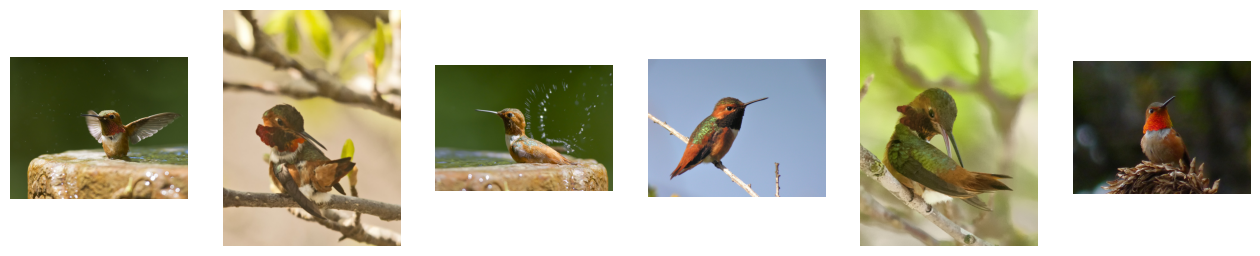

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directorio que contiene las imágenes
directorio_imagenes = "/content/images/Allen_s Hummingbird (Adult Male)"

# Obtener la lista de archivos de imágenes en el directorio
archivos_imagenes = os.listdir(directorio_imagenes)

# Seleccionar las primeras 6 imágenes (puedes ajustar según sea necesario)
imagenes_a_mostrar = archivos_imagenes[:6]

# Configurar el diseño del gráfico
fig, axs = plt.subplots(1, 6, figsize=(16, 4))

# Mostrar cada imagen en su respectivo subgráfico
for i, imagen in enumerate(imagenes_a_mostrar):
    ruta_imagen = os.path.join(directorio_imagenes, imagen)
    img = mpimg.imread(ruta_imagen)
    axs[i].imshow(img)
    axs[i].set_axis_off()

# Mostrar el gráfico
plt.show()

Sin embargo, todas las imágenes tienen tamaños diferentes, por lo que se deberan preprocesar primero:

- Cambiar el tamaño de la imagen al definido.
- Normalizar y/o reescalar los valores de los píxeles de las imagenes en un rango [-1, 1], que es lo que espera el modelo (No es obligatorio en Imagen).

Estas acciones de preprocesamiento son ejecutadas de manera predeterminada por el modelo, como se muestra en el siguiente código:

self.transform = T.Compose([
            T.Lambda(convert_fn),
            T.Resize(image_size),
            T.RandomHorizontalFlip(),
            T.CenterCrop(image_size),
            T.ToTensor()
        ])

Formatos aceptados:
exts = ['jpg', 'jpeg', 'png', 'tiff']

## Preparación librerias necesarias para utilizar el modelo de difusión

Ignora las librerias que no se instalaron

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install imagen-pytorch > /dev/null
!pip install einops > /dev/null
!pip install einops_exts > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


Por favor, ejecuta esta celda únicamente si los archivos necesarios están almacenados en tu Google Drive.

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Es necesario que instancies el conjunto de datos.

In [7]:
dataset_nabirds = "/content/images"

### Descarga el punto de control

Esta descarga llevará un tiempo debido al tamaño del archivo de control "checkpoint.pt", que es aproximadamente de 7.3 GB.

In [8]:
import os
import gdown

# Enlace de Google Drive
file_url = 'https://drive.google.com/uc?id=10QRN3WMSF9DPiiHGf8c46uVwh0FbNhEx'

# Directorio de salida en Google Colab
output_dir = '/content/Diffusion_output_dir'

# Crear el directorio si no existe
os.makedirs(output_dir, exist_ok=True)

# Ruta de destino para guardar el archivo descargado
output_file_path = os.path.join(output_dir, 'checkpoint.20500.pt')

# Descargar el archivo
gdown.download(file_url, output_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10QRN3WMSF9DPiiHGf8c46uVwh0FbNhEx
To: /content/Diffusion_output_dir/checkpoint.20500.pt
100%|██████████| 7.24G/7.24G [01:06<00:00, 109MB/s]


'/content/Diffusion_output_dir/checkpoint.20500.pt'

Si tienes suficiente memoria RAM puedes modificar los parametros del modelo: **dim**, **image_size**, **batch_size** y asi lograr mejores resultados en el entrenamiento.

**Esto puede llevar algún tiempo mientras se carga el punto de control.**

In [ ]:
import os
from imagen_pytorch import Unet, Imagen, ImagenTrainer
from imagen_pytorch.data import Dataset
import torch

# unets for unconditional imagen

unet = Unet(
    dim = 128,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True),
    attn_heads = 8
)

# imagen, which contains the unet above

imagen = Imagen(
    condition_on_text = False,  # this must be set to False for unconditional Imagen
    unets = unet,
    image_sizes = 64,
    timesteps = 4000
)

trainer = ImagenTrainer(
    imagen = imagen,
    split_valid_from_train = True, # whether to split the validation dataset from the training
    checkpoint_path = '/content/Diffusion_output_dir/',
    checkpoint_every = 500
).cuda()

# instantiate your dataloader, which returns the necessary inputs to the DDPM as tuple in the order of images, text embeddings, then text masks. in this case, only images is returned as it is unconditional training

dataset = Dataset(dataset_nabirds, image_size = 64)

trainer.add_train_dataset(dataset, batch_size = 4)


# save and load the trainer and all associated states with the save and load methods.
checkpoint_path = '/content/Diffusion_output_dir/'

trainer.save(os.path.join(checkpoint_path, 'checkpoint.0.pt'))

trainer.load(os.path.join(checkpoint_path, 'checkpoint.0.pt'))

# trainer.steps # (2,) step number for each of the unets, in this case 2


# Update the path to the desired location in your Google Drive
save_path = '/content/Samples_Hummingbird/'


log_dir = '/content/Logs/'
os.makedirs(log_dir, exist_ok=True)

# working training loop

losses = []

for i in range(200000):
    loss = trainer.train_step(unet_number = 1, max_batch_size = 4)
    losses.append(loss)
    print(f'loss: {loss}')

    if not (i % 50):
        valid_loss = trainer.valid_step(unet_number = 1, max_batch_size = 4)
        print(f'valid loss: {valid_loss}')

    torch.cuda.empty_cache()

    # if not (i % 100) and trainer.is_main: # is_main makes sure this can run in distributed
        # images = trainer.sample(batch_size = 1, return_pil_images = True) # returns List[Image]
        # images[0].save(f'./sample-{i // 100}.png')


    # if not (i % 100) and trainer.is_main: # is_main makes sure this can run in distributed
        # images = trainer.sample(batch_size=1, return_pil_images=True) # returns List[Image]
        # file_path = f'{save_path}sample-{i // 100}.png'
        # images[0].save(file_path)
        # print(f'Saved image at: {file_path}')

    # Guardar la pérdida en un archivo de texto cada 100 iteraciones
    if not (i % 100):
        with open(os.path.join(log_dir, 'valid_losses_Hummingbird.txt'), 'a') as file:
            file.write(f'Iteration {i}, Loss: {valid_loss}\n')

Ten en cuenta que cada archivo **checkpoint.pt** tiene un tamaño aproximado de 6.8 GB, y debes sobrescribir cada uno de ellos.

Enlace de descarga: https://drive.google.com/drive/folders/1QK28EBXbEcuidawNdP08K1UToMbNQ9E_?usp=sharing

Puedes ver algunos ejemplos generados durante el entrenamiento del subdataset Allen's Hummingbird (Adult Male) en los siguientes enlaces:

1. https://drive.google.com/drive/folders/1fvufnlG-OPZiOUp6EvXDK6iiH5fSUwOw?usp=sharing

2. https://drive.google.com/drive/folders/1PNtb2LstIjpdZAg5_VE9Hfep1tsEfLl3?usp=sharing

Aunque el entrenamiento se limitó a una única especie de ave, persisten dificultades significativas debido a los desafíos inherentes para captar la complejidad.

Queda el subconjunto de datos ubicado en /**content/Generative-Diffusion-Model-for-Bird-Image-Generation/dataset/Allen's Hummingbird (Female, immature).zip** para realizar un ajuste fino del modelo preentrenado en Allen's Hummingbird (Adult Male) o un entrenamiento desde cero.

## Puedes generar imagenes

<font color='red'>Si has ejecutado la celda precedente, se requiere desconectar y eliminar la instancia de ejecución antes de proceder con la ejecución de esta celda. En caso de contar con recursos de memoria suficientes, puedes obviar las instrucciones previas.</font>

La generación condicional de imágenes mediante entrenamiento con texto no se llevó a cabo debido a las restricciones significativas en los recursos computacionales disponibles.

**Esto puede llevar algún tiempo mientras se carga el punto de control.**

In [9]:
import os
from imagen_pytorch import Unet, Imagen, ImagenTrainer
from imagen_pytorch.data import Dataset
import torch

# Remember to instantiate the trainer if the previous cell was not executed.

# unets for unconditional imagen

unet = Unet(
    dim = 128,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True),
    attn_heads = 8
)

# imagen, which contains the unet above

imagen = Imagen(
    condition_on_text = False,  # this must be set to False for unconditional Imagen
    unets = unet,
    image_sizes = 128,
    timesteps = 4000
)

trainer = ImagenTrainer(
    imagen = imagen,
    split_valid_from_train = True, # whether to split the validation dataset from the training
    checkpoint_path = '/content/Diffusion_output_dir/',
    checkpoint_every = 500
).cuda()


# save and load the trainer and all associated states with the save and load methods.
checkpoint_path = '/content/Diffusion_output_dir/'

trainer.load(os.path.join(checkpoint_path, 'checkpoint.20500.pt'))

images = trainer.sample(batch_size = 1, return_pil_images = True) # (1, 3, 128, 128) returns List[Image]

images[0].save(f'./sample-Allen_s Hummingbird (Adult Male).png')

config.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

checkpoint loaded from /content/Diffusion_output_dir/checkpoint.20500.pt
checkpoint loaded from /content/Diffusion_output_dir/checkpoint.20500.pt


0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/4000 [00:00<?, ?it/s]

### Observa las imagenes generadas

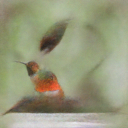

In [17]:
from IPython.display import Image

# Ruta de la imagen generada
image_path = '/content/Generative-Diffusion-Model-for-Bird-Image-Generation/sample-Allen_s Hummingbird (Adult Male).png'

# Mostrar la imagen
display(Image(filename=image_path))

Tambien puedes utilizar el checkpoint.27000.pt el cual es del modelo preentrenado durante 30 horas con el dataset de NABirds completo (9 GB)

Enlace de descarga: https://drive.google.com/drive/folders/1JjgB39KpGpsLIwbFVMmUKBwpEgLHcruq?usp=sharing

Puedes ver algunos ejemplos generados en los siguientes enlaces:

1. https://drive.google.com/drive/folders/1EeXK0zGV-zsOMiZwmSOIUyqXfmxfd5oA?usp=sharing

2. https://drive.google.com/drive/folders/1o7tNiZBZiqXkePumyiR48mfgDHqYsdJP?usp=sharing

Aunque las imágenes no guardan similitud aparente con aves, al examinar el conjunto de datos NABirds, se puede inferir que el modelo de difusión estaba en las etapas iniciales de captar la distribución de los datos.